### PROJETC FINANCIAL MARKETS - PAIR TRADING  ( FOCUS ON BACKTESTING)

## SELECTION OF THE PAIR MADE WITH PCA_DBSCAN

In [51]:
import pandas as pd
import numpy as np
import yfinance as yf
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from curl_cffi import requests

In [52]:
import time
session = requests.Session(impersonate="chrome")

In [ ]:
# Stocks
TICKERS = ['PYPL', 'V', 'MA', 'PSFE', 'AXP', 
          'AFRM', 'BABA', 'WEX', 'GDOT', 'ALLY', 'MELI', 
          'BAC', 'GPN', 'WFC', 'COF', 'FICO', 
          'DFS', 'SYF', 'XYZ']

#using values downloaded from yfinance
prices = pd.read_excel('Stocks_joao.xlsx', sheet_name= 'Stocks')
prices['Date'] = pd.to_datetime(prices['Date'])

returns = prices.set_index('Date').pct_change().dropna()
returns 

,AFRM,ALLY,AXP,BABA,BAC,COF,DFS,FICO,GDOT,GPN,MA,MELI,PSFE,PYPL,SYF,V,WEX,WFC,XYZ
Date,,,,,,,,,,,,,,,,,,,
2023-01-04,0.086813,0.033579,0.023246,0.129811,0.018800,0.030440,0.044128,0.030193,0.060318,0.032735,0.024077,0.013715,0.049237,0.041700,0.021920,0.025170,0.006669,0.020579,0.025681
2023-01-05,-0.070779,-0.005150,-0.023930,0.006351,-0.002050,-0.018998,-0.016984,-0.019933,-0.015569,-0.014495,-0.009517,0.022270,0.077330,-0.018278,-0.033837,-0.007055,-0.013618,-0.005393,-0.023982
2023-01-06,-0.014146,0.038232,0.025541,0.026965,0.009979,0.032879,0.035058,0.008444,0.043187,0.031281,0.046896,0.020302,0.026994,0.002753,0.025641,0.031453,0.040609,0.008958,0.066141
2023-01-09,0.040839,0.004987,0.001532,0.031937,-0.015112,0.003915,0.008152,-0.013407,-0.011662,0.012266,0.008975,0.027293,0.019116,0.007845,-0.015548,0.003903,0.015956,-0.009579,0.001015
2023-01-10,0.066808,0.019466,0.010638,0.036542,0.006787,0.010775,0.016654,-0.013488,0.027139,-0.010802,0.000108,0.020584,0.039859,0.010898,0.017033,0.011391,0.010294,-0.000708,0.014046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,0.014627,0.013897,0.015596,0.004463,0.011164,0.011946,0.011862,0.011805,0.028046,0.010464,0.012761,0.007769,0.013937,0.015535,0.017721,0.010813,0.003977,0.014885,0.020047
2024-12-26,0.014416,0.007273,0.001746,0.006548,0.003831,0.001318,0.001925,-0.020086,0.008467,0.006904,0.000821,-0.006040,0.011455,-0.001246,0.002852,0.000811,0.017767,0.002375,0.004392
2024-12-27,-0.033059,-0.009997,-0.009671,-0.011849,-0.004714,-0.011735,-0.013113,-0.012304,-0.013993,-0.012395,-0.007367,-0.004207,-0.015855,-0.014522,-0.013322,-0.007011,-0.009558,-0.009058,-0.027438


In [54]:
prices = prices.set_index('Date')
prices 

,AFRM,ALLY,AXP,BABA,BAC,COF,DFS,FICO,GDOT,GPN,MA,MELI,PSFE,PYPL,SYF,V,WEX,WFC,XYZ
Date,,,,,,,,,,,,,,,,,,,
2023-01-03,9.100000,22.281981,142.451508,88.829376,31.492916,89.124313,92.037926,591.190002,15.750000,98.153412,341.668091,826.109985,14.420000,74.580002,30.462767,203.852264,161.940002,39.284397,64.639999
2023-01-04,9.890000,23.030182,145.762955,100.360390,32.084995,91.837250,96.099388,609.039978,16.700001,101.366417,349.894531,837.440002,15.130000,77.690002,31.130516,208.983246,163.020004,40.092831,66.300003
2023-01-05,9.190000,22.911568,142.274841,100.997787,32.019211,90.092529,94.467224,596.900024,16.440001,99.897064,346.564545,856.090027,16.299999,76.269997,30.077160,207.508820,160.800003,39.876621,64.709999
2023-01-06,9.060000,23.787516,145.908707,103.721191,32.338741,93.054710,97.779022,601.940002,17.150000,103.021896,362.817200,873.469971,16.740000,76.480003,30.848364,214.035553,167.330002,40.233837,68.989998
2023-01-09,9.430000,23.906136,146.132187,107.033707,31.850039,93.418991,98.576118,593.869995,16.950001,104.285553,366.073639,897.309998,17.059999,77.080002,30.368719,214.871017,170.000000,39.848423,69.059998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,65.900002,35.154888,301.746460,85.519997,44.101688,181.579468,175.971863,2104.989990,10.630000,112.673592,534.074524,1743.290039,17.459999,88.250000,66.011009,320.111359,171.669998,71.238289,91.080002
2024-12-26,66.849998,35.410557,302.273438,86.080002,44.270622,181.818771,176.310684,2062.709961,10.720000,113.451477,534.513184,1732.760010,17.660000,88.139999,66.199272,320.370941,174.720001,71.407463,91.480003
2024-12-27,64.639999,35.056553,299.350037,85.059998,44.061939,179.685120,173.998688,2037.329956,10.570000,112.045296,530.575256,1725.469971,17.379999,86.860001,65.317398,318.124695,173.050003,70.760651,88.970001


Principal components: 14


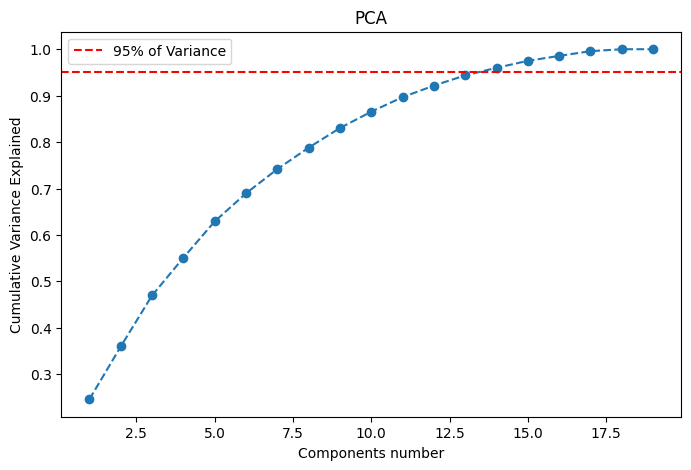

In [55]:
'''
If PCA indicates many (20-30) components to explain 95% of the variance, this suggests that the data has high dimensionality, 
and perhaps reducing it to 2 components is too aggressive.

How to solve?
If we want to use DBSCAN, we need a number of components small enough to reduce noise, but large enough to capture
important information.

Options: 
-Reduce explainability 
-Try DBSCAN with multiple components

'''
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(returns.T)  # Transpose --> this will put the prices on the top of columns,
                                                    #to identify components 

# PCA
pca = PCA()
pca.fit(X_scaled)

# Cumulative Variance Explained
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components for 95% of the variance explained
n_components = np.argmax(explained_variance >= 0.95) + 1
print(f"Principal components: {n_components}")

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% of Variance')
plt.xlabel('Components number')
plt.ylabel('Cumulative Variance Explained')
plt.title('PCA')
plt.legend()
plt.show()

In [56]:
for n in [ 3, 5 ,7, 6, 10, 13, 14]:  # Test different number of components
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X_scaled)
    
    dbscan = DBSCAN(eps=4, min_samples=2) #select the best EPS paramter --> bigger EPS, bigger clusters
    labels = dbscan.fit_predict(X_pca)
    
    num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    print(f"For {n} components, DBSCAN found {num_clusters} clusters")

For 3 components, DBSCAN found 2 clusters
For 5 components, DBSCAN found 3 clusters
For 7 components, DBSCAN found 3 clusters
For 6 components, DBSCAN found 3 clusters
For 10 components, DBSCAN found 3 clusters
For 13 components, DBSCAN found 1 clusters
For 14 components, DBSCAN found 1 clusters


In [ ]:
#let's choose 10 components because it explains, at least, 80% of the variance
pca = PCA(n_components=10) 
X_pca = pca.fit_transform(X_scaled)

dbscan = DBSCAN(eps=4, min_samples=2)  # choose the best parameters --> bigger EPS, bigger clusters
labels = dbscan.fit_predict(X_pca)

clusters = {}
tickers = returns.columns

for ticker, cluster in zip(tickers, labels):
    if cluster == -1:  # -1 noise points 
        continue
    if cluster not in clusters:
        clusters[cluster] = []
    clusters[cluster].append(ticker)

pairs = [group for group in clusters.values() if len(group) > 1]

print("Possible Pairs:")
for pair in pairs:
    print(pair)

Possible Pairs:
['BAC', 'WFC']
['COF', 'SYF']
['MA', 'V']


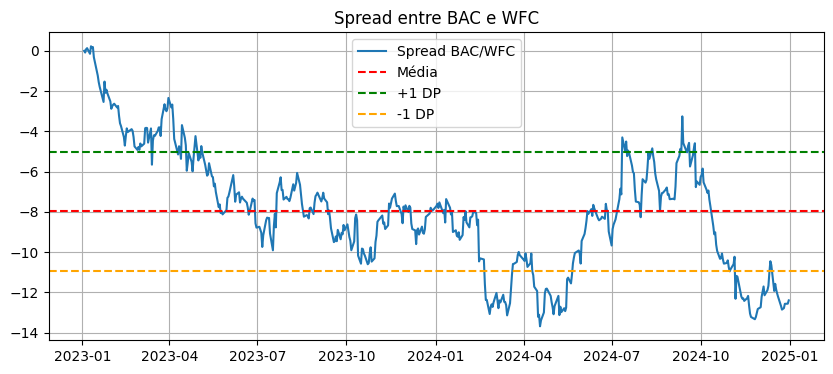

Par: BAC - WFC | P-Valor ADF: 0.0860
NOT Stationary.



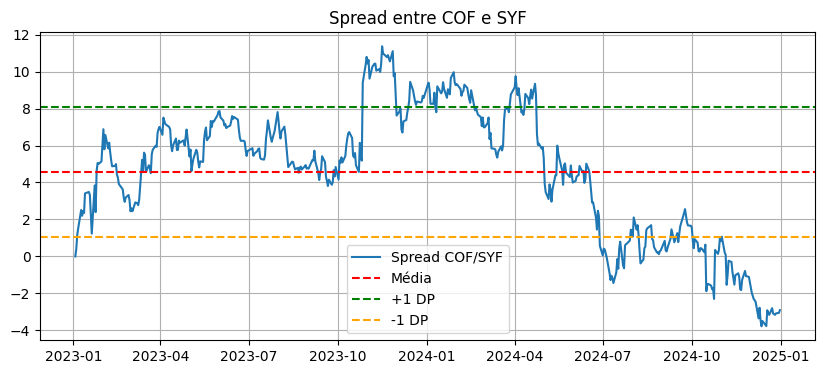

Par: COF - SYF | P-Valor ADF: 0.5107
NOT Stationary.



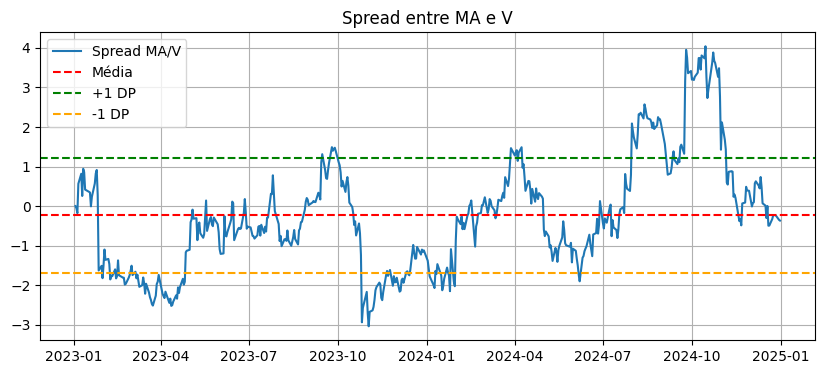

Par: MA - V | P-Valor ADF: 0.0556
NOT Stationary.



In [ ]:
# Suggested pairs (by DBSCAN clustering)

''' pairs = [['BAC', 'WFC'],
['COF', 'DFS'],
['COF', 'SYF'],
['DFS', 'SYF'],
['GPN', 'WEX'],
['MA', 'V']] '''


pairs = [['BAC', 'WFC'],
['COF', 'SYF'],
['MA', 'V']] 



prices = pd.read_excel('Stocks_joao.xlsx', sheet_name='Stocks')


# Find the 'Date' column and set it as index
prices.columns = prices.columns.str.strip()
date_col = [col for col in prices.columns if 'date' in col.lower()]
if date_col:
    prices = prices.set_index(date_col[0])
else:
    raise ValueError("Coluna 'Date' não encontrada no dataframe!")


# Filtering only tickers that exist in the Excel
available_tickers = prices.columns.tolist()
filtered_pairs = [pair for pair in pairs if pair[0] in available_tickers and pair[1] in available_tickers]


def test_spread(pair, data):
    stock1, stock2 = pair

    # Normalization
    initial_scale = data[stock1].iloc[0] / data[stock2].iloc[0]
    stock2_scaled = data[stock2] * initial_scale

    # Calculate spread percentage
    spread = ((data[stock1] - stock2_scaled) / (data[stock1] + stock2_scaled)) * 100

    # Teste Dickey-Fuller (ADF)
    adf_result = adfuller(spread.dropna())
    p_value = adf_result[1]

    # Plot of spread
    plt.figure(figsize=(10, 4))
    plt.plot(spread, label=f'Spread {stock1}/{stock2}')
    plt.axhline(spread.mean(), linestyle='--', color='red', label='Média')
    plt.axhline(spread.mean() + spread.std(), linestyle='--', color='green', label='+1 DP')
    plt.axhline(spread.mean() - spread.std(), linestyle='--', color='orange', label='-1 DP')
    plt.legend()
    plt.title(f'Spread entre {stock1} e {stock2}')
    plt.grid(True)
    plt.show()

    # Results of ADF
    print(f"Par: {stock1} - {stock2} | P-Valor ADF: {p_value:.4f}")
    if p_value < 0.05:
        print("Stationary.\n")
    else:
        print("NOT Stationary.\n")

# 6. Loop through pairs and test spread
for pair in filtered_pairs:
    test_spread(pair, prices)


## CHOOSING THE PAR BAC - WFC


## Pair Execution:
	-Test: Put an EXTRA band above and below like an capital reinforcement

In [59]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


import openpyxl

In [ ]:
#  BAC and WFC - Test
stock1 = 'BAC'
stock2 = 'WFC'

data = pd.read_excel('Stocks_joao.xlsx', sheet_name='Stocks')

# Filter the data
data = prices[[stock1, stock2]].dropna()

# 4. Show initial result
print(data.head(2))

                  BAC        WFC
Date                            
2023-01-03  31.492916  39.284397
2023-01-04  32.084995  40.092831


In [61]:
# Calculate spread
initial_scale = data[stock1].iloc[0] / data[stock2].iloc[0]
stock2_scaled = data[stock2] * initial_scale
spread = ((data[stock1] - stock2_scaled) / (data[stock1] + stock2_scaled)) * 100
spread.head(2)

Date
2023-01-03    0.000000
2023-01-04   -0.087213
dtype: float64

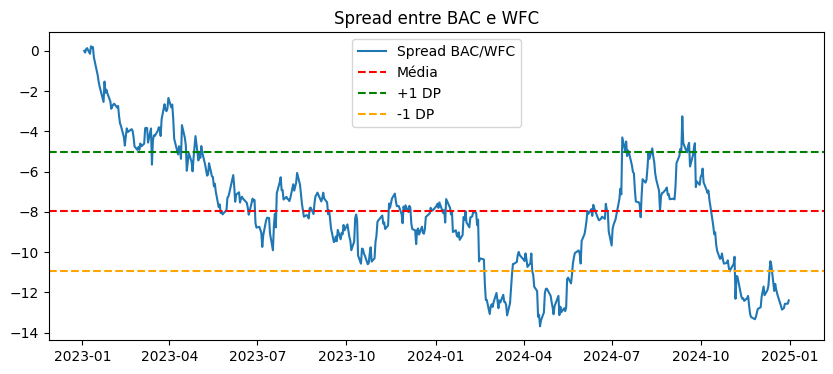

In [ ]:
# Plot spread with extra bands above +1 DP and below -1 DP


plt.figure(figsize=(10, 4))
plt.plot(spread, label=f'Spread {stock1}/{stock2}')
plt.axhline(spread.mean(), color='red', linestyle='--', label='Média')
plt.axhline(spread.mean() + spread.std(), color='green', linestyle='--', label='+1 DP')
#plt.axhline(spread.mean() - spread.std() - 1, color='yellow', linestyle='--', label='Banda extra inferior')
#plt.axhline(spread.mean() + spread.std() + 1, color='blue', linestyle='--', label='Banda extra superior')
plt.axhline(spread.mean() - spread.std(), color='orange', linestyle='--', label='-1 DP')
plt.legend()
plt.title(f'Spread entre {stock1} e {stock2}')
plt.show()

In [ ]:
'''
Input Data:

    Historical prices for both stocks in the pair
    Spread (calculated as Stock1 - Stock2)
    Indicators (Moving Average, Z-score, Bollinger Bands, etc.)
    Market conditions (volatility, volume, macro factors)
'''
#This features are also being used in the backtest

window = 20  # Moving average window

features = pd.DataFrame(index=data.index)
features['Spread'] = spread
features['Z-Score'] = (spread - spread.rolling(window).mean()) / spread.rolling(window).std()
features['Spread_MA'] = spread.rolling(window).mean()
features['Spread_Std'] = spread.rolling(window).std()
features['Rolling_Corr'] = data['BAC'].rolling(window).corr(data['WFC'])

def rsi(series, period=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

features['RSI'] = rsi(spread)
features['Bollinger_Width'] = (features['Spread_Std'] * 2) / features['Spread_MA']
features.dropna(inplace=True)

features.dropna(inplace=True)
features.head()

,Spread,Z-Score,Spread_MA,Spread_Std,Rolling_Corr,RSI,Bollinger_Width
Date,,,,,,,
2023-01-31,-2.878980,-1.612664,-1.096331,1.105406,0.815256,21.700401,-2.016556
2023-02-01,-2.751160,-1.339587,-1.233889,1.132640,0.835478,23.767688,-1.835887
2023-02-02,-2.671930,-1.145727,-1.363125,1.142335,0.863660,24.498839,-1.676054
2023-02-03,-2.627663,-1.005868,-1.498534,1.122541,0.885248,27.565600,-1.498185
2023-02-06,-2.814919,-1.072289,-1.645836,1.090268,0.907234,32.041584,-1.324880


In [ ]:
# Labeling Trades
'''
Labels (EXAMPLE):

    Long (Buy Stock 1, Sell Stock 2) → When the spread is too low (below -1 standard deviation)
    Short (Sell Stock 1, Buy Stock 2) → When the spread is too high (above +1 standard deviation)
    Hold (No trade) → When the spread is within the neutral range
    If spread is above the mean but below the upper threshold, it gets a new label 2 (Slightly Bullish).
    If spread is below the mean but above the lower threshold, it gets a new label -2 (Slightly Bearish).

    short - 0
    ------------------
    between mean and upper - 1 

    --------------
    between mean and lower - 2 

    -------------------
    long - 3

    --> Choose your trading method! --> you can use z-score, moving averages, bollinger bands, bands across the ratio...
'''


# This is the problem:
'''You are calculating the extra thresholds (extra_upper / extra_lower), but only checking them after the normal thresholds.

If the spread > upper_threshold, it never checks if it passed the extra_upper.

The same goes for extra_lower.'''

def label_trades(row):
    # Principal thresholds
    upper_threshold = row['Spread_MA'] + row['Spread_Std']
    lower_threshold = row['Spread_MA'] - row['Spread_Std']
    # Extra thresholds
    #extra_upper_threshold = row['Spread_MA'] + 2 * row['Spread_Std']
    #extra_lower_threshold = row['Spread_MA'] - 2 * row['Spread_Std']

    # Extra cases first (extra bands)
    #if row['Spread'] > extra_upper_threshold:
        #return 6  # Extra Short Trade
    #elif row['Spread'] < extra_lower_threshold:
        #return 5  # Extra Long Trade

    # Normal cases
    if row['Spread'] > upper_threshold:
        return 0  # Short Trade
    elif row['Spread'] < lower_threshold:
        return 3  # Long Trade

    # Medium region between mean and thresholds
    elif row['Spread_MA'] <= row['Spread'] <= upper_threshold:
        return 1  # Slightly Bullish
    elif lower_threshold <= row['Spread'] <= row['Spread_MA']:
        return 2  # Slightly Bearish

    # NEUTRAL case
    else:
        return 4  # Hold


features['Trade_Signal'] = features.apply(label_trades, axis=1)
features.head()

,Spread,Z-Score,Spread_MA,Spread_Std,Rolling_Corr,RSI,Bollinger_Width,Trade_Signal
Date,,,,,,,,
2023-01-31,-2.878980,-1.612664,-1.096331,1.105406,0.815256,21.700401,-2.016556,3
2023-02-01,-2.751160,-1.339587,-1.233889,1.132640,0.835478,23.767688,-1.835887,3
2023-02-02,-2.671930,-1.145727,-1.363125,1.142335,0.863660,24.498839,-1.676054,3
2023-02-03,-2.627663,-1.005868,-1.498534,1.122541,0.885248,27.565600,-1.498185,3
2023-02-06,-2.814919,-1.072289,-1.645836,1.090268,0.907234,32.041584,-1.324880,3


In [65]:
# Split Data -->RANDOM
X = features.drop(columns=['Trade_Signal'])
y = features['Trade_Signal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#With this slipt
#Every time we run the code, we get the same train-test split
#Always testing on the same dataset, making comparisons meaningful
#The train and test sets have the same distribution of labels, preventing imbalance issues.

# Train Random Forest Model --> you have multiple options >> XGBoost or LSTMs 

rf_model = RandomForestClassifier(n_estimators=50, max_depth=7, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        32

    accuracy                           1.00        97
   macro avg       1.00      1.00      1.00        97
weighted avg       1.00      1.00      1.00        97



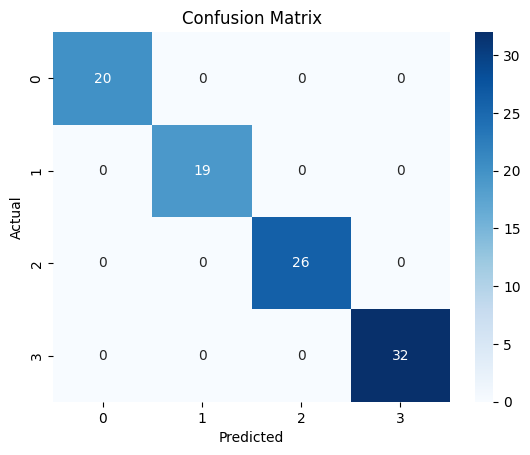

In [66]:
# Model Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [67]:
print(f"Training set size: {len(X_train)}, Test set size: {len(X_test)}")
print("Checking for overlaps:", X_train.index.intersection(X_test.index))

Training set size: 386, Test set size: 97
Checking for overlaps: DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)


In [68]:
rf_model = RandomForestClassifier(n_estimators=50, max_depth=7, random_state=42)
rf_model

RandomForestClassifier(max_depth=7, n_estimators=50, random_state=42)

In [69]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=50, random_state=42)

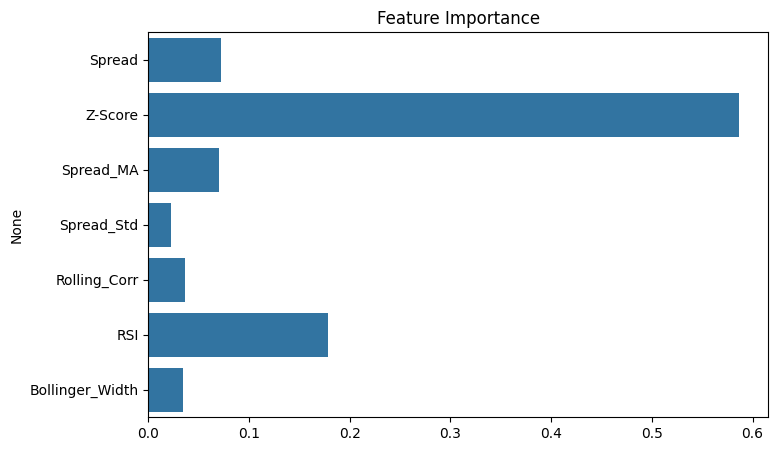

In [70]:
importances = rf_model.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance")
plt.show()

In [71]:
# Split Data --> last 20% of the dataset 

features = features.sort_index()

# Define split index (last 20% of the dataset)
split_idx = int(len(features) * 0.8)

X_train, X_test = features.iloc[:split_idx].drop(columns=['Trade_Signal']), features.iloc[split_idx:].drop(columns=['Trade_Signal'])
y_train, y_test = features.iloc[:split_idx]['Trade_Signal'], features.iloc[split_idx:]['Trade_Signal']

# Print sizes to confirm
print(f"Training set size: {len(X_train)}, Test set size: {len(X_test)}")

Training set size: 386, Test set size: 97


In [72]:
rf_model = RandomForestClassifier(n_estimators=50, max_depth=7, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        43

    accuracy                           1.00        97
   macro avg       1.00      1.00      1.00        97
weighted avg       1.00      1.00      1.00        97



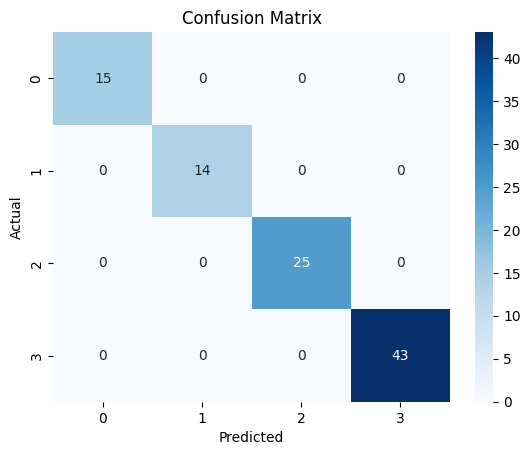

In [73]:
# Model Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### BACKTESTING IN EXECUTED MODEL ( USING WFV)
# backtest WITH Walk-Forward Validation (WFV) for a Pair Tradibng strategy based on a Random Forest model.

In [ ]:
'''WFV - This is a type of time-series-aware validation.

Instead of a fixed train-test, it moves forward with a training window and tests in the immediate future.

It is like backtesting a real strategy:
➔ ‘Train today, test tomorrow,’
➔ then ‘move the window forward’

vs 

normal cross-validation:

Cross-Validation (K-Fold)                                                                                    Walk-Forward Validation (WFV)
Random: divides the data into K ‘folds’ independently (shuffled or sequential).                    Respects time: never uses future data to predict the past.
Assumes that the data is iid (independent and identically distributed).                                    Assumes that there is temporal dependence (time order).
Can mix training and testing outside the time sequence.                                                    Always trains with the past → Always tests with the future.
E.g.: fold 1 may have data from March, fold 2 from February → does not respect chronology.                            E.g.: trains until Feb/2023, tests in March/2023 → chronology maintained.
Good for classification/regression models with stationary data (e.g., image, text). Essential for trading backtesting, forecasting, financial series.

'''

'WFV - É um tipo de validação time-series-aware.\n\nEm vez de um train-test fixo, vai andando com uma janela de treino e testando no futuro imediato.\n\nÉ como fazer backtesting de uma estratégia real:\n➔ "Treinas até hoje, testas amanhã",\n➔ depois "andas a janela para a frente"\n\nvs \n\ncross-validation normal:\n\nCross-Validation (K-Fold)\t                                                                                Walk-Forward Validation (WFV)\nAleatória: divide os dados em K “folds” de forma independente (embaralhado ou sequencial).\t                Respeita o tempo: nunca usa dados futuros para prever o passado.\nSupõe que os dados são iid (independentes e identicamente distribuídos).\t                                Supõe que existe dependência temporal (time order).\nPode misturar treino e teste fora de sequência temporal.\t                                                Treinas sempre com o passado → Testas sempre com o futuro.\nEx: fold 1 pode ter dados de Março, fold 2 d

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

stock1 = 'BAC'
stock2 = 'WFC'
data = pd.read_excel('Stocks_joao.xlsx', sheet_name='Stocks')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

data = data[[stock1, stock2]].dropna()

initial_scale = data[stock1].iloc[0] / data[stock2].iloc[0]
stock2_scaled = data[stock2] * initial_scale
spread = ((data[stock1] - stock2_scaled) / (data[stock1] + stock2_scaled)) * 100

data['Spread'] = spread

In [76]:
window = 20  # Moving average window

features = pd.DataFrame(index=data.index)
features['Spread'] = spread
features['Z-Score'] = (spread - spread.rolling(window).mean()) / spread.rolling(window).std()
features['Spread_MA'] = spread.rolling(window).mean()
features['Spread_Std'] = spread.rolling(window).std()
features['Rolling_Corr'] = data['BAC'].rolling(window).corr(data['WFC'])

def rsi(series, period=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

features['RSI'] = rsi(spread)
features['Bollinger_Width'] = (features['Spread_Std'] * 2) / features['Spread_MA']
features.dropna(inplace=True)

features.dropna(inplace=True)
features.head(5)

,Spread,Z-Score,Spread_MA,Spread_Std,Rolling_Corr,RSI,Bollinger_Width
Date,,,,,,,
2023-01-31,-2.878980,-1.612664,-1.096331,1.105406,0.815256,21.700401,-2.016556
2023-02-01,-2.751160,-1.339587,-1.233889,1.132640,0.835478,23.767688,-1.835887
2023-02-02,-2.671930,-1.145727,-1.363125,1.142335,0.863660,24.498839,-1.676054
2023-02-03,-2.627663,-1.005868,-1.498534,1.122541,0.885248,27.565600,-1.498185
2023-02-06,-2.814919,-1.072289,-1.645836,1.090268,0.907234,32.041584,-1.324880


NEW CODE --> WITH random forest 

In [ ]:

def load_data(file_path, ticker1, ticker2):
    data = pd.read_excel(file_path)
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)
    data['Spread'] = data[ticker1] - data[ticker2]
    return data

# FEATURE ENGINEERING
def create_features(data, spread_col='Spread', window=30):
    spread = data[spread_col]
    features = pd.DataFrame(index=data.index)
    features['Spread'] = spread
    features['Spread_MA'] = spread.rolling(window).mean()
    features['Spread_Std'] = spread.rolling(window).std()
    features['Z-Score'] = (spread - features['Spread_MA']) / features['Spread_Std']
    features['Rolling_Corr'] = data['BAC'].rolling(window).corr(data['WFC'])
    features['Rolling_Beta'] = spread.rolling(window).cov(data['BAC']) / data['WFC'].rolling(window).var()
    features['Spread_Momentum'] = spread.diff().rolling(window).mean()
    features['Bollinger_Width'] = (features['Spread_Std'] * 2) / features['Spread_MA']
    features['RSI'] = spread.diff().apply(lambda x: max(x,0)).rolling(14).mean() / spread.diff().abs().rolling(14).mean()
    features.dropna(inplace=True)
    return features

# GENERATE BAND SIGNALS (TRIGGERS)
def generate_band_signals(data, window=30):
    spread_ma = data['Spread'].rolling(window).mean()
    spread_std = data['Spread'].rolling(window).std()
    upper_band = spread_ma + spread_std
    lower_band = spread_ma - spread_std
    #extra_upper_band = spread_ma + 2 * spread_std
    #extra_lower_band = spread_ma - 2 * spread_std

    signals = pd.Series(0, index=data.index)
    signals[data['Spread'] > upper_band] = -1
    signals[data['Spread'] < lower_band] = 1
    #signals[data['Spread'] > extra_upper_band] = -2
    #signals[data['Spread'] < extra_lower_band] = 2
    return signals

# GENERATE LABELS (foi um bom trade?)
def generate_labels(data, spread_col='Spread', horizon=10, threshold=0.5):
    future_return = data[spread_col].shift(-horizon) - data[spread_col]
    labels = (future_return.abs() >= threshold).astype(int)
    return labels

# BACKTEST WITH WFV AND RF FILTER
def backtest_rf_filter(data, features, band_signals, labels, train_size=0.8, window_size=20):
    features = features.loc[band_signals != 0]
    labels = labels.loc[features.index]
    band_signals = band_signals.loc[features.index]

    initial_train = int(len(features) * train_size)
    strategy_returns = []

    for start in range(initial_train, len(features) - window_size):
        train_X = features.iloc[start - initial_train:start]
        train_y = labels.iloc[start - initial_train:start]
        test_X = features.iloc[start:start + window_size]
        test_idx = test_X.index

        model = RandomForestClassifier(n_estimators=50, max_depth=7, random_state=42)
        model.fit(train_X, train_y)
        preds = model.predict(test_X)

        filtered_signals = band_signals.loc[test_idx] * preds
        delta_spread = data['Spread'].diff().fillna(0).loc[test_idx]
        returns = filtered_signals * delta_spread

        strategy_returns.extend(returns)

    pnl = np.cumsum(strategy_returns)
    sharpe = np.mean(strategy_returns) / np.std(strategy_returns) if np.std(strategy_returns) > 0 else 0

    plt.figure(figsize=(12, 5))
    plt.plot(pnl, label='PnL Strategy (Bands + RF Filter)')
    plt.title(f'PnL accumulated | Sharpe: {sharpe:.2f}')
    plt.grid(True)
    plt.legend()
    plt.show()




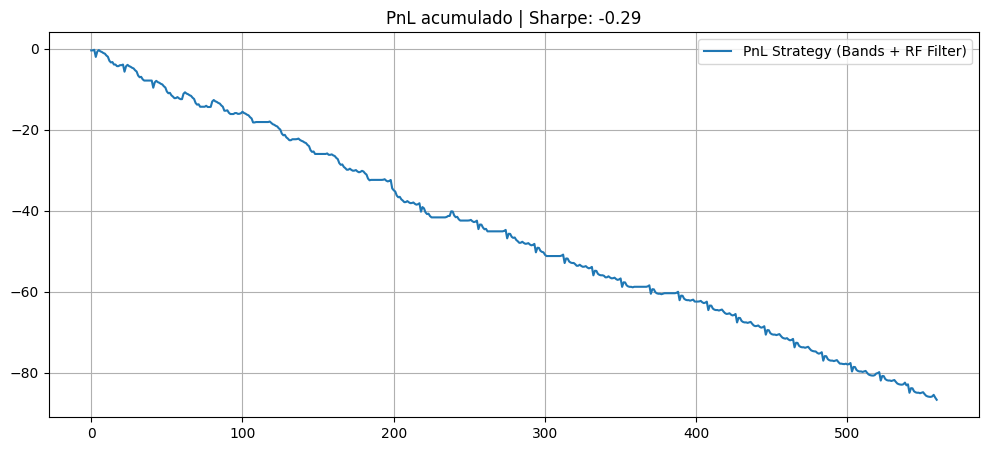

In [79]:
features = create_features(data)

band_signals = generate_band_signals(data)

labels = generate_labels(data)

backtest_rf_filter(data, features, band_signals, labels)


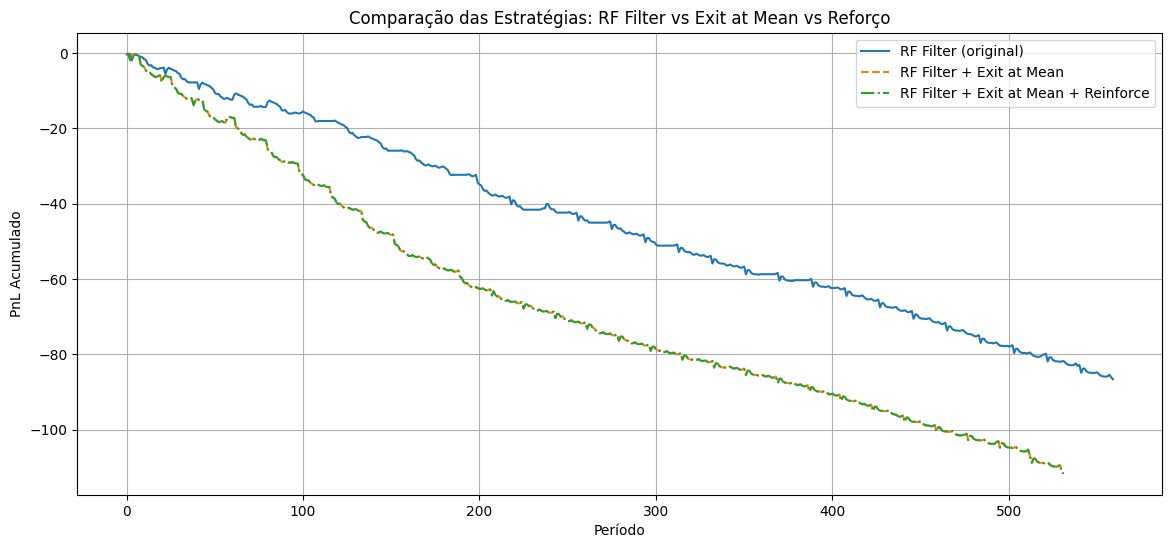

In [ ]:
# 1️⃣ RF Filter simple never closes trades (without reinforcement strategy)
def backtest_rf_filter(data, features, band_signals, labels, train_size=0.8, window_size=20):
    features = features.loc[band_signals != 0]
    labels = labels.loc[features.index]
    band_signals = band_signals.loc[features.index]

    initial_train = int(len(features) * train_size)
    strategy_returns = []

    for start in range(initial_train, len(features) - window_size):
        train_X = features.iloc[start - initial_train:start]
        train_y = labels.iloc[start - initial_train:start]
        test_X = features.iloc[start:start + window_size]
        test_idx = test_X.index

        model = RandomForestClassifier(n_estimators=50, max_depth=7, random_state=42)
        model.fit(train_X, train_y)
        preds = model.predict(test_X)

        filtered_signals = band_signals.loc[test_idx] * preds
        delta_spread = data['Spread'].diff().fillna(0).loc[test_idx]
        returns = filtered_signals * delta_spread

        strategy_returns.extend(returns)

    pnl = np.cumsum(strategy_returns)
    return pnl

# RF Filter + Exit at Mean
def backtest_rf_filter_with_exit(data, features, band_signals, labels, train_size=0.8, window_size=20):
    features = features.loc[band_signals != 0]
    labels = labels.loc[features.index]
    band_signals = band_signals.loc[features.index]

    spread = data['Spread']
    spread_ma = features['Spread_MA']

    initial_train = int(len(features) * train_size)
    strategy_returns = []

    position = 0

    for start in range(initial_train, len(features) - window_size):
        train_X = features.iloc[start - initial_train:start]
        train_y = labels.iloc[start - initial_train:start]
        test_X = features.iloc[start:start + window_size]
        test_idx = test_X.index

        model = RandomForestClassifier(n_estimators=50, max_depth=7, random_state=42)
        model.fit(train_X, train_y)
        preds = model.predict(test_X)

        for i, idx in enumerate(test_idx):
            if position != 0:
                if (position > 0 and spread.loc[idx] >= spread_ma.loc[idx]) or \
                   (position < 0 and spread.loc[idx] <= spread_ma.loc[idx]):
                    position = 0

            if position == 0:
                signal = band_signals.loc[idx]
                if signal != 0 and preds[i] == 1:
                    if signal in [1, 2]:
                        position = 1
                    elif signal in [-1, -2]:
                        position = -1

            if i > 0:
                prev_idx = test_idx[i - 1]
                delta_spread = spread.loc[idx] - spread.loc[prev_idx]
                pnl = position * delta_spread
                strategy_returns.append(pnl)

    pnl = np.cumsum(strategy_returns)
    return pnl

# RF Filter + Exit at Mean + reenforcement
def backtest_rf_filter_with_exit_and_reinforce(data, features, band_signals, labels, train_size=0.8, window_size=20):
    features = features.loc[band_signals != 0]
    labels = labels.loc[features.index]
    band_signals = band_signals.loc[features.index]

    spread = data['Spread']
    spread_ma = features['Spread_MA']

    initial_train = int(len(features) * train_size)
    strategy_returns = []

    position = 0

    for start in range(initial_train, len(features) - window_size):
        train_X = features.iloc[start - initial_train:start]
        train_y = labels.iloc[start - initial_train:start]
        test_X = features.iloc[start:start + window_size]
        test_idx = test_X.index

        model = RandomForestClassifier(n_estimators=50, max_depth=7, random_state=42)
        model.fit(train_X, train_y)
        preds = model.predict(test_X)

        for i, idx in enumerate(test_idx):
            if position != 0:
                if (position > 0 and spread.loc[idx] >= spread_ma.loc[idx]) or \
                   (position < 0 and spread.loc[idx] <= spread_ma.loc[idx]):
                    position = 0

            if position == 0:
                signal = band_signals.loc[idx]
                if signal != 0 and preds[i] == 1:
                    if signal == 1:
                        position = 1
                    elif signal == -1:
                        position = -1

            ''' if position != 0:
                signal = band_signals.loc[idx]
                if signal == 2 and position > 0:
                    position = 2
                elif signal == -2 and position < 0:
                    position = -2 '''

            if i > 0:
                prev_idx = test_idx[i - 1]
                delta_spread = spread.loc[idx] - spread.loc[prev_idx]
                pnl = position * delta_spread
                strategy_returns.append(pnl)

    pnl = np.cumsum(strategy_returns)
    return pnl

# ---------------------
# Plot Comparison
# ---------------------
pnl_original = backtest_rf_filter(data, features, band_signals, labels)
pnl_exit_mean = backtest_rf_filter_with_exit(data, features, band_signals, labels)
pnl_reinforce = backtest_rf_filter_with_exit_and_reinforce(data, features, band_signals, labels)

plt.figure(figsize=(14, 6))
plt.plot(pnl_original, label='RF Filter (original)')
plt.plot(pnl_exit_mean, label='RF Filter + Exit at Mean', linestyle='--')
plt.plot(pnl_reinforce, label='RF Filter + Exit at Mean + Reinforce', linestyle='-.')
plt.title('Comparação das Estratégias: RF Filter vs Exit at Mean vs Reforço')
plt.xlabel('Período')
plt.ylabel('PnL Acumulado')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
'''	
CV + WFV

CV: Choose the best model, features, parameters (e.g. max_depth, n_estimators)
WFV: Perform a realistic backtest simulating real-time trading
'''


'\t\nCV + WFV\n\nCV: Escolher melhor modelo, features, parâmetros (ex: max_depth, n_estimators)\nWFV: Fazer o backtest realista, simulando trading em tempo real\n\n'

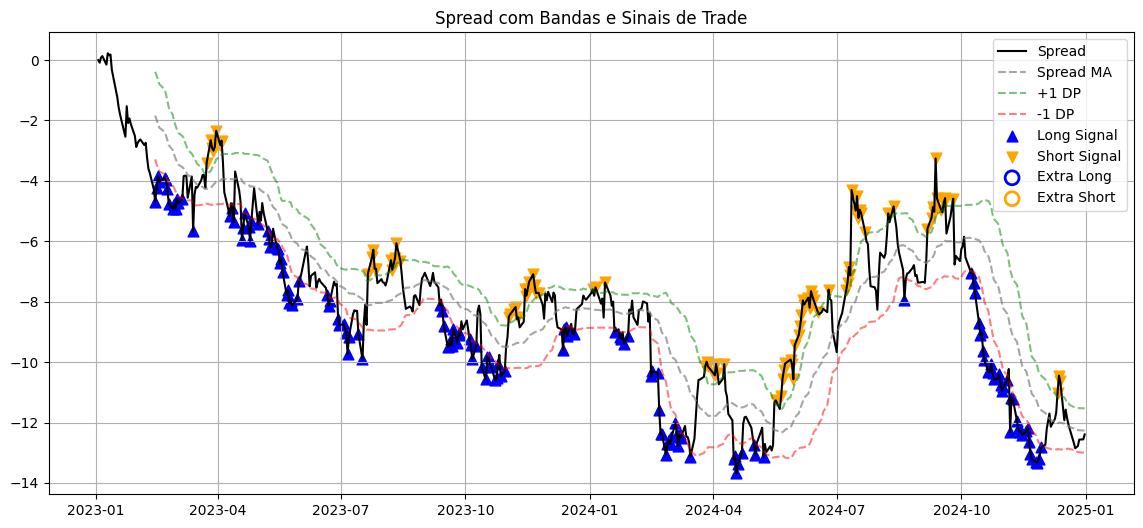

In [ ]:
# Spread plot with bands and trade signals
def plot_spread_signals(data, band_signals, window=30):
    spread = data['Spread']
    spread_ma = spread.rolling(window).mean()
    spread_std = spread.rolling(window).std()
    upper_band = spread_ma + spread_std
    lower_band = spread_ma - spread_std
    #extra_upper_band = spread_ma + 2 * spread_std
    #extra_lower_band = spread_ma - 2 * spread_std

    plt.figure(figsize=(14, 6))
    plt.plot(spread, label='Spread', color='black')
    plt.plot(spread_ma, linestyle='--', color='gray', alpha=0.7, label='Spread MA')
    plt.plot(upper_band, linestyle='--', color='green', alpha=0.5, label='+1 DP')
    plt.plot(lower_band, linestyle='--', color='red', alpha=0.5, label='-1 DP')
    #plt.plot(extra_upper_band, linestyle='--', color='blue', alpha=0.3, label='+2 DP')
    #plt.plot(extra_lower_band, linestyle='--', color='orange', alpha=0.3, label='-2 DP')

    # Point signals on the spread plot (band signals)
    plt.scatter(band_signals[band_signals == 1].index, spread[band_signals == 1], marker='^', color='blue', label='Long Signal', s=60)
    plt.scatter(band_signals[band_signals == -1].index, spread[band_signals == -1], marker='v', color='orange', label='Short Signal', s=60)
    plt.scatter(band_signals[band_signals == 2].index, spread[band_signals == 2], marker='o', edgecolors='blue', facecolors='none', label='Extra Long', s=100, linewidths=2)
    plt.scatter(band_signals[band_signals == -2].index, spread[band_signals == -2], marker='o', edgecolors='orange', facecolors='none', label='Extra Short', s=100, linewidths=2)

    plt.title('Spread com Bandas e Sinais de Trade')
    plt.legend()
    plt.grid(True)
    plt.show()


plot_spread_signals(data, band_signals)


CODIGO FINAL -- RF Filter + Exit at Mean + Reforço com cross validation
----

In [ ]:
# GENERATE BAND SIGNALS (TRIGGERS)
def generate_band_signals(data, window=30):
    spread_ma = data['Spread'].rolling(window).mean()
    spread_std = data['Spread'].rolling(window).std()
    upper_band = spread_ma + spread_std
    lower_band = spread_ma - spread_std
    #extra_upper_band = spread_ma + 2 * spread_std
    #extra_lower_band = spread_ma - 2 * spread_std

    signals = pd.Series(0, index=data.index)
    signals[data['Spread'] > upper_band] = -1
    signals[data['Spread'] < lower_band] = 1
    #signals[data['Spread'] > extra_upper_band] = -2
    #signals[data['Spread'] < extra_lower_band] = 2
    return signals

# GENERATE LABELS (was it a good trade?)
def generate_labels(data, spread_col='Spread', horizon=10, threshold=0.5):
    future_return = data[spread_col].shift(-horizon) - data[spread_col]
    labels = (future_return.abs() >= threshold).astype(int)
    return labels

# FEATURE ENGINEERING 
def create_features(data, spread_col='Spread', window=30):
    spread = data[spread_col]
    features = pd.DataFrame(index=data.index)
    features['Spread'] = spread
    features['Spread_MA'] = spread.rolling(window).mean()
    features['Spread_Std'] = spread.rolling(window).std()
    features['Z-Score'] = (spread - features['Spread_MA']) / features['Spread_Std']
    features['Rolling_Corr'] = data['BAC'].rolling(window).corr(data['WFC'])
    features['Rolling_Beta'] = spread.rolling(window).cov(data['BAC']) / data['WFC'].rolling(window).var()
    features['Spread_Momentum'] = spread.diff().rolling(window).mean()
    features['Bollinger_Width'] = (features['Spread_Std'] * 2) / features['Spread_MA']
    features['RSI'] = spread.diff().apply(lambda x: max(x,0)).rolling(14).mean() / spread.diff().abs().rolling(14).mean()
    features.dropna(inplace=True)
    return features

Melhor configuração (CV): {'max_depth': 3, 'n_estimators': 200}
Best CV Score: 0.6692307692307693


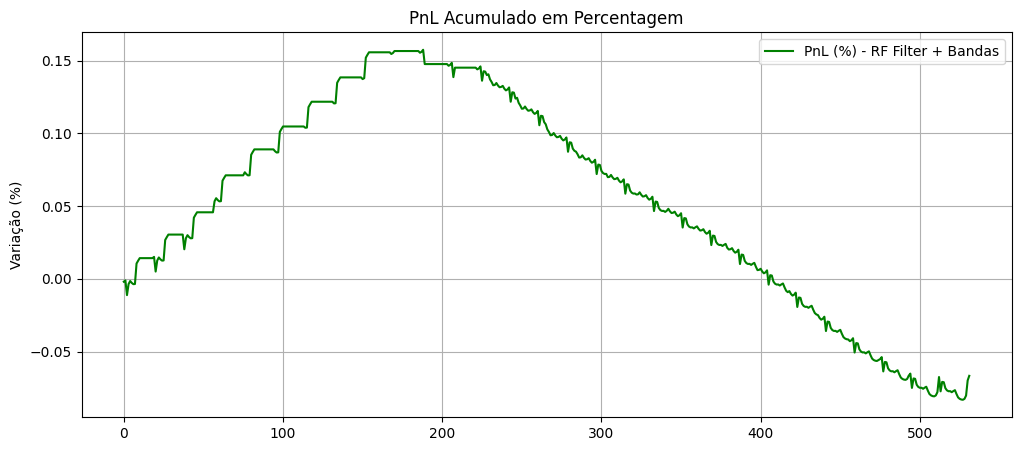

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV


# Model Selection via Cross-Validation
def model_selection_cv(X, y):
    tscv = TimeSeriesSplit(n_splits=5)
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 6, 7, 8, 9, 10, None]
    }

    grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                               param_grid,
                               cv=tscv,
                               scoring='accuracy')
    grid_search.fit(X, y)

    print("Melhor configuração (CV):", grid_search.best_params_)
    print("Best CV Score:", grid_search.best_score_)
    return grid_search.best_estimator_


def backtest_rf_filter_with_fixed_thresholds(data, features, band_signals, labels, model, train_size=0.8, window_size=20):
    features = features.loc[band_signals != 0]
    labels = labels.loc[features.index]
    band_signals = band_signals.loc[features.index]

    spread = data['Spread']

    initial_train = int(len(features) * train_size)

    # CALCULATE FIXED MEAN AND STD FROM INITIAL TRAINING PERIOD
    spread_fixed_mean = spread.loc[features.index[:initial_train]].mean()
    spread_fixed_std = spread.loc[features.index[:initial_train]].std()

    strategy_returns = []
    position_size = 0.0  # +0.3 / +0.7 long, -0.3 / -0.7 short

    for start in range(initial_train, len(features) - window_size):
        train_X = features.iloc[start - initial_train:start]
        train_y = labels.loc[train_X.index]
        test_X = features.iloc[start:start + window_size]
        test_idx = test_X.index

        model.fit(train_X, train_y)
        preds = model.predict(test_X)

        for i, idx in enumerate(test_idx):
            spread_value = spread.loc[idx]

            # Close if Spread touches fixed mean
            if position_size != 0:
                if (position_size > 0 and spread_value >= spread_fixed_mean) or \
                   (position_size < 0 and spread_value <= spread_fixed_mean):
                    position_size = 0.0  # Close everything

            # Open position if no position and trigger on bands (±1 DP fixed)
            if position_size == 0.0:
                if spread_value > spread_fixed_mean + spread_fixed_std and preds[i] == 1:
                    position_size = -0.4  # Short
                elif spread_value < spread_fixed_mean - spread_fixed_std and preds[i] == 1:
                    position_size = 0.4   # Long

            # Reinforcement if touches extra band (±2 DP fixed)
            ''' if abs(position_size) == 0.3:
                if spread_value > spread_fixed_mean + 2 * spread_fixed_std and position_size < 0:
                    position_size = -0.7  # Reinforcement Short
                elif spread_value < spread_fixed_mean - 2 * spread_fixed_std and position_size > 0:
                    position_size = 0.7   # Reinforcement Long '''

            # Calculate PnL- returns
            if i > 0:
                prev_idx = test_idx[i - 1]
                delta_spread = spread.loc[idx] - spread.loc[prev_idx]
                pnl = position_size * delta_spread
                strategy_returns.append(pnl)

    initial_capital = 7000
    pnl = np.cumsum(strategy_returns)
    pnl_percent = (pnl / initial_capital) * 100

    # Plot PnL in percentage
    plt.figure(figsize=(12, 5))
    plt.plot(pnl_percent, label='PnL (%) - RF Filter + Bands', color='green')
    plt.ylabel('Variation (%)')
    plt.title('PnL Acumulated in Percentage')
    plt.grid(True)
    plt.legend()
    plt.show()

    return pnl





features = create_features(data)

band_signals = generate_band_signals(data)

labels = generate_labels(data)

X = features
y = labels.loc[features.index]

best_model = model_selection_cv(X, y)


pnl_fixed = backtest_rf_filter_with_fixed_thresholds(data, features, band_signals, labels, best_model)


## REAL TESTING



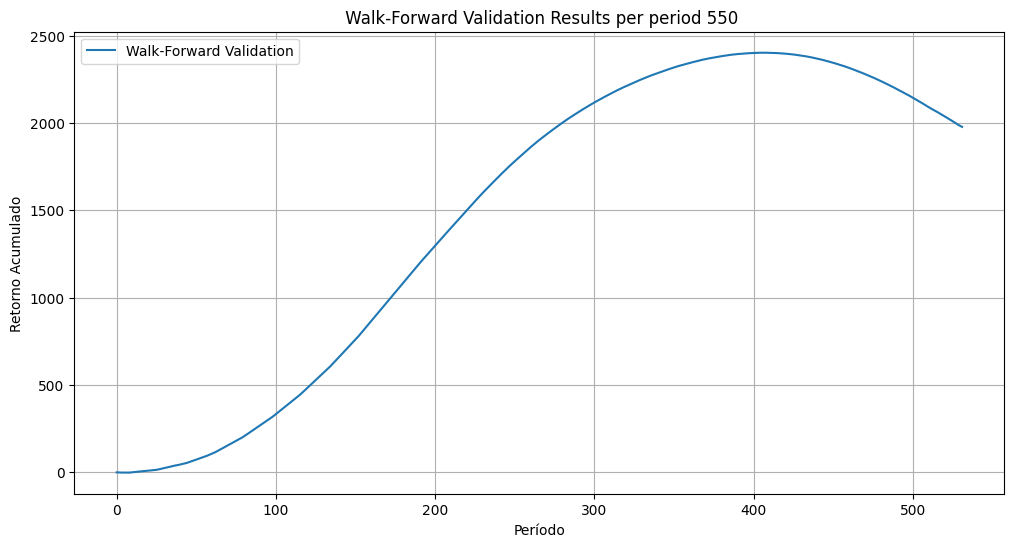

Walk-Forward | Retorno Total: 1977.21 | Sharpe (aprox): 0.74


In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Preparation of features and labels
# Cleaning NaNs
features_clean = features.dropna().copy()

# Aligning features and labels
X = features_clean
y = labels.loc[features_clean.index]

zscore_cv = features_clean['Z-Score'].values

# Cross-Validation with TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
cv_returns = []

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    z = zscore_cv[test_index]
    delta_z = np.diff(z, prepend=z[0])
    returns = np.where(preds == 1, delta_z, -delta_z)
    cv_returns.extend(returns)

# Comparison visual
plt.figure(figsize=(12, 6))

plt.plot(np.cumsum(pnl_fixed), label="Walk-Forward Validation")
plt.title(" Walk-Forward Validation Results per period 550")
plt.xlabel("Período")
plt.ylabel("Retorno Acumulado")
plt.legend()
plt.grid(True)
plt.show()

# Summary statistics
def resumo(r, nome):
    total = np.sum(r)
    sharpe = np.mean(r) / np.std(r) if np.std(r) > 0 else 0
    print(f"{nome} | Retorno Total: {total:.2f} | Sharpe (aprox): {sharpe:.2f}")


resumo(pnl_fixed, "Walk-Forward")


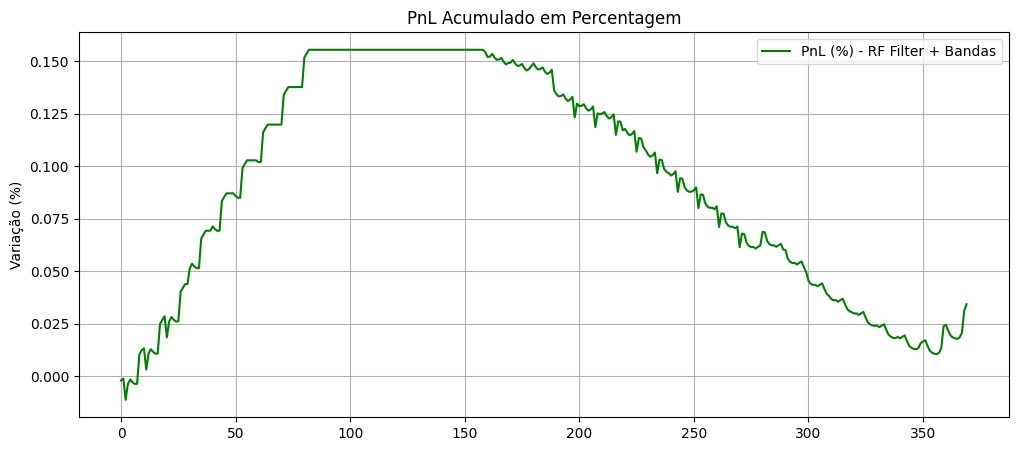

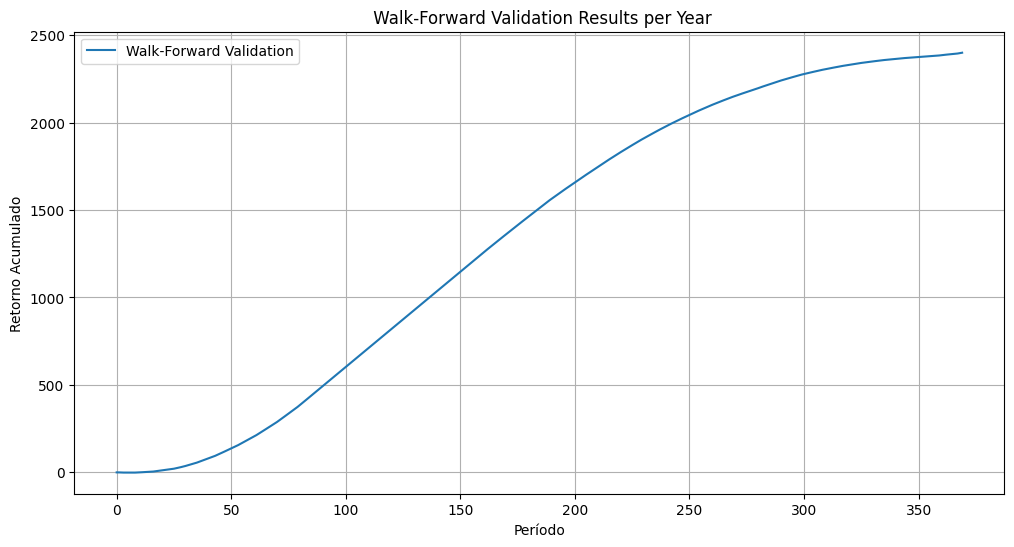

Walk-Forward | Retorno Total: 2399.30 | Retorno Total (%): 34.28% | Sharpe (aprox): 1.75


In [ ]:
# Walk-Forward Validation for 1 year
# reduce the plot period window to 366 days
pnl_fixed366 = backtest_rf_filter_with_fixed_thresholds(data, features, band_signals, labels, best_model, window_size=11)

# Comparison visual
plt.figure(figsize=(12, 6))

plt.plot(np.cumsum(pnl_fixed366), label="Walk-Forward Validation")
plt.title(" Walk-Forward Validation Results per Year")
plt.xlabel("Period")
plt.ylabel("Returns Acumulated")
plt.legend()
plt.grid(True)
plt.show()

# Summary statistics
def resumo(r, nome):
    
    total = np.sum(r)
    sharpe = np.mean(r) / np.std(r) if np.std(r) > 0 else 0
    # Exibir retorno em percentagem 
    total_percent = (total / 7000) * 100
    print(f"{nome} | Total Returns: {total:.2f} | Total Returns (%): {total_percent:.2f}% | Sharpe (aprox): {sharpe:.2f}")
    


resumo(pnl_fixed366, "Walk-Forward")
